# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./app/Reacher.app')

Mono path[0] = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Reacher.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Reacher.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [3]:
print(env.brain_names)


# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

['ReacherBrain']
Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.90150833e+00 -1.00000000e+00
  1.25147629e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.22214413e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
from unityagents import UnityEnvironment
import numpy as np
%matplotlib inline

env = UnityEnvironment(file_name='./app/Reacher_20.app', worker_id=0, no_graphics=True)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))


Mono path[0] = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Reacher_20.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Reacher_20.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33


### 5. Train the DDPG Agent

In [ ]:
from rl_algo.ddpg_agent import Agent as DDPGAgent
from utils.reacher_train import train_agent


ddpgAgent = DDPGAgent(state_size=state_size, action_size=action_size, exploration_noise=0.2, lr_actor=1e-3)


reward_hist = train_agent(env, ddpgAgent, num_agents=num_agents, episodes=150)


--------------------------------------------------
DDPG Agent Parameters:
--------------------------------------------------
State Size:         33
Action Size:        4
Random Seed:        None
--------------------------------------------------
Learning Parameters:
Buffer Size:        1000000
Batch Size:         256
Gamma (Discount):   0.99
Tau (Soft Update):  0.001
Actor LR:           0.001
Critic LR:          0.001
Exploration Noise:  0.2
Learning Starts:    10000 steps
--------------------------------------------------
Episode    1 | Avg: 0.323 | Score: 0.323 | Min: 0.000 | Max: 0.920
Episode    2 | Avg: 0.288 | Score: 0.252 | Min: 0.060 | Max: 0.640
Episode    3 | Avg: 0.301 | Score: 0.327 | Min: 0.000 | Max: 0.640
Episode    4 | Avg: 0.318 | Score: 0.368 | Min: 0.000 | Max: 1.000
Episode    5 | Avg: 0.315 | Score: 0.303 | Min: 0.000 | Max: 1.240
Episode    6 | Avg: 0.363 | Score: 0.605 | Min: 0.000 | Max: 1.680
Episode    7 | Avg: 0.443 | Score: 0.921 | Min: 0.000 | Max: 3.060
Ep

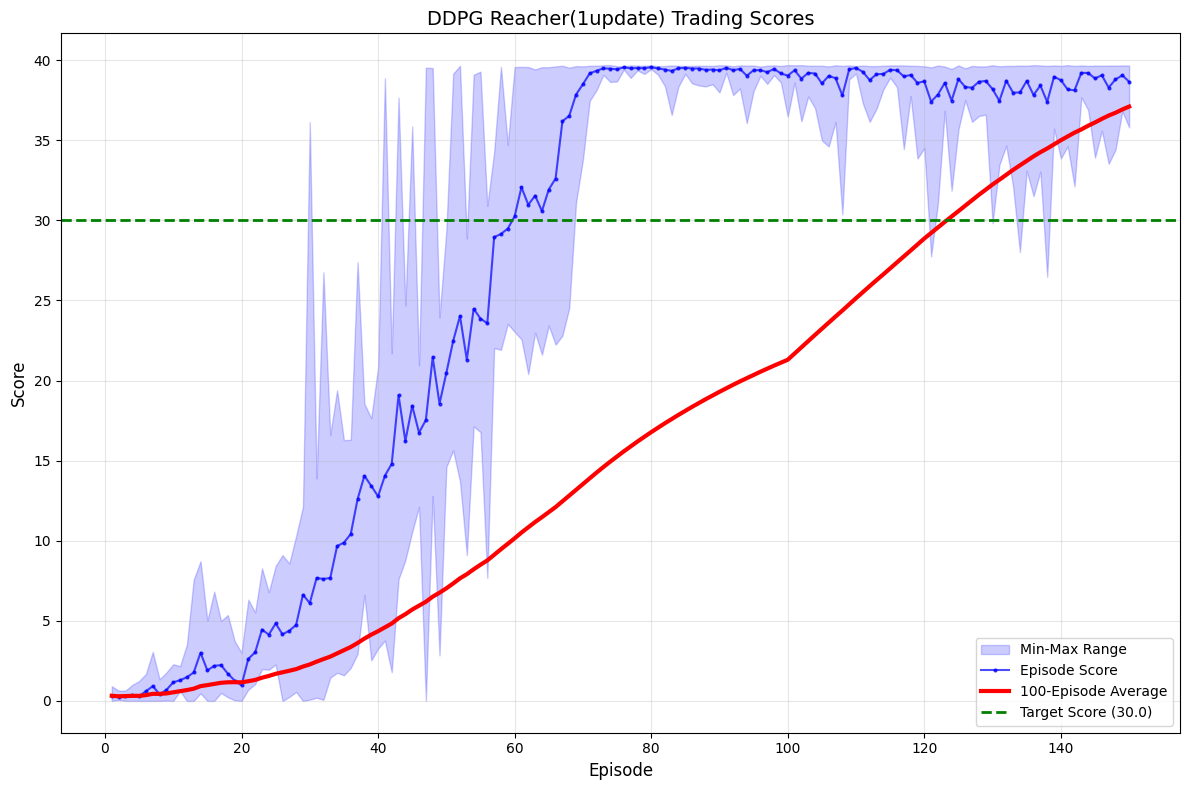

In [4]:
from utils.plotting import plot_scores
import numpy as np

reward_hist = np.load('./data/ddpg_reacher_noise02_update1.npy')

fig = plot_scores(reward_hist, window_size=100, title='DDPG Reacher(1update) Trading Scores')

In [ ]:
# import torch 

# torch.save({
#     'actor': ddpgAgent.actor_local.state_dict(),
#     'critic': ddpgAgent.critic_local.state_dict()
#     }, 'checkpoint_ddpg_gaus0.2.pth')

In [ ]:
# np.save('ddpg_gaus0.2.npy', reward_hist)
# Load a single array
# loaded_array = np.load('array.npy')

### 6. Train the Agent with DDPG and update 5 times per step

Here I will train the agent using the DDPG algorithm with update 5 times per step and Gaussian noise 0.2 as previously done.

In [ ]:

from utils.reacher_train import train_agent
from utils.plotting import plot_scores
from rl_algo.ddpg_agent import Agent as DDPGAgent


ddpgAgent = DDPGAgent(state_size=state_size, action_size=action_size, 
                      exploration_noise=0.2, 
                      skip_steps=1,
                      update_times=5,
                      lr_actor=1e-3,
                      learning_starts=5000)

reward_hist = train_agent(env, ddpgAgent, num_agents=num_agents, episodes=150)

--------------------------------------------------
DDPG Agent Parameters:
--------------------------------------------------
State Size:         33
Action Size:        4
Random Seed:        None
--------------------------------------------------
Learning Parameters:
Buffer Size:        1000000
Batch Size:         256
Gamma (Discount):   0.99
Tau (Soft Update):  0.001
Actor LR:           0.001
Critic LR:          0.001
Exploration Noise:  0.2
Learning Starts:    5000 steps
--------------------------------------------------
Episode    1 | Avg-100: 0.404 | Score: 0.404 | Min: 0.000 | Max: 1.080
Episode    2 | Avg-100: 0.667 | Score: 0.930 | Min: 0.000 | Max: 2.150
Episode    3 | Avg-100: 1.223 | Score: 2.335 | Min: 0.860 | Max: 3.850
Episode    4 | Avg-100: 1.436 | Score: 2.075 | Min: 0.240 | Max: 3.780
Episode    5 | Avg-100: 1.791 | Score: 3.209 | Min: 0.000 | Max: 9.700
Episode    6 | Avg-100: 2.036 | Score: 3.259 | Min: 1.090 | Max: 10.060
Episode    7 | Avg-100: 2.051 | Score: 2.141 

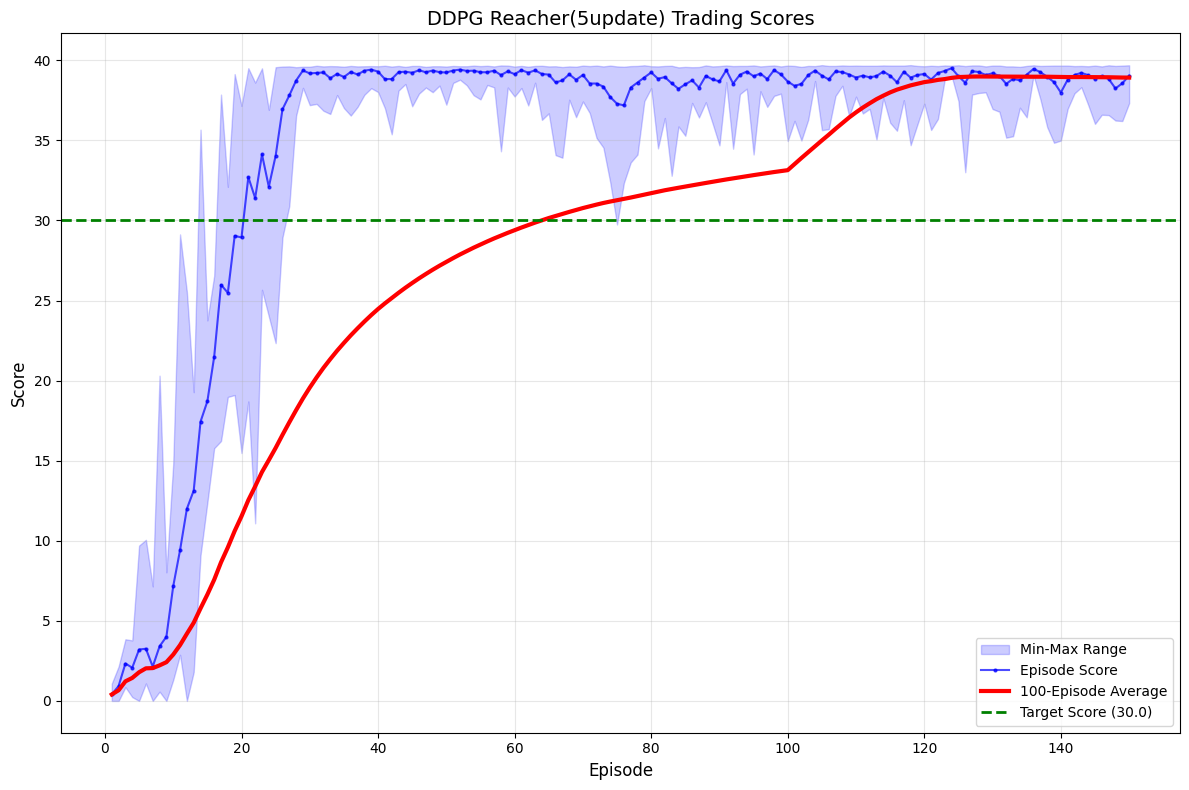

In [5]:
# fig = plot_scores(reward_hist)
# np.save('ddpg_gaus_2.npy', reward_hist)

reward_hist = np.load('./data/ddpg_reacher_noise02_update5.npy')

fig = plot_scores(reward_hist, window_size=100, title='DDPG Reacher(5update) Trading Scores')

### 7. Train the Agent with TD3

Train the agent using the standard TD3 algorithm.

In [ ]:
from utils.plotting import plot_scores
from utils.reacher_train import train_agent
from rl_algo.td3_agent import Agent as TD3Agent

td3Agent = TD3Agent(state_size=state_size, 
                    action_size=action_size, 
                    exploration_noise=0.2, 
                    lr_actor=3e-4, 
                    lr_critic=3e-4,
                    skip_steps=1,
                    update_times=5,
                    learning_starts=5000)

reward_hist = train_agent(env, td3Agent, num_agents=num_agents, episodes=150, save_name='checkpoint_td3_expl0.2')

--------------------------------------------------
TD3 Agent Parameters:
--------------------------------------------------
State Size:            33
Action Size:           4
Random Seed:           None
--------------------------------------------------
Learning Parameters:
Buffer Size:           1000000
Batch Size:            256
Gamma (Discount):      0.99
Tau (Soft Update):     0.005
Actor LR:              0.0003
Critic LR:             0.0003
Exploration Noise:     0.2
Target Policy Noise:   0.2
Target Noise Clip:     0.5
Policy Frequency:      2
Skip Steps:            1
Update Times:          5
Learning Starts:       5000 steps
--------------------------------------------------
Episode    1 | Avg-100: 0.695 | Score: 0.695 | Min: 0.000 | Max: 2.060
Episode    2 | Avg-100: 0.470 | Score: 0.244 | Min: 0.000 | Max: 1.290
Episode    3 | Avg-100: 0.395 | Score: 0.244 | Min: 0.000 | Max: 1.230
Episode    4 | Avg-100: 0.314 | Score: 0.071 | Min: 0.000 | Max: 0.780
Episode    5 | Avg-100: 0

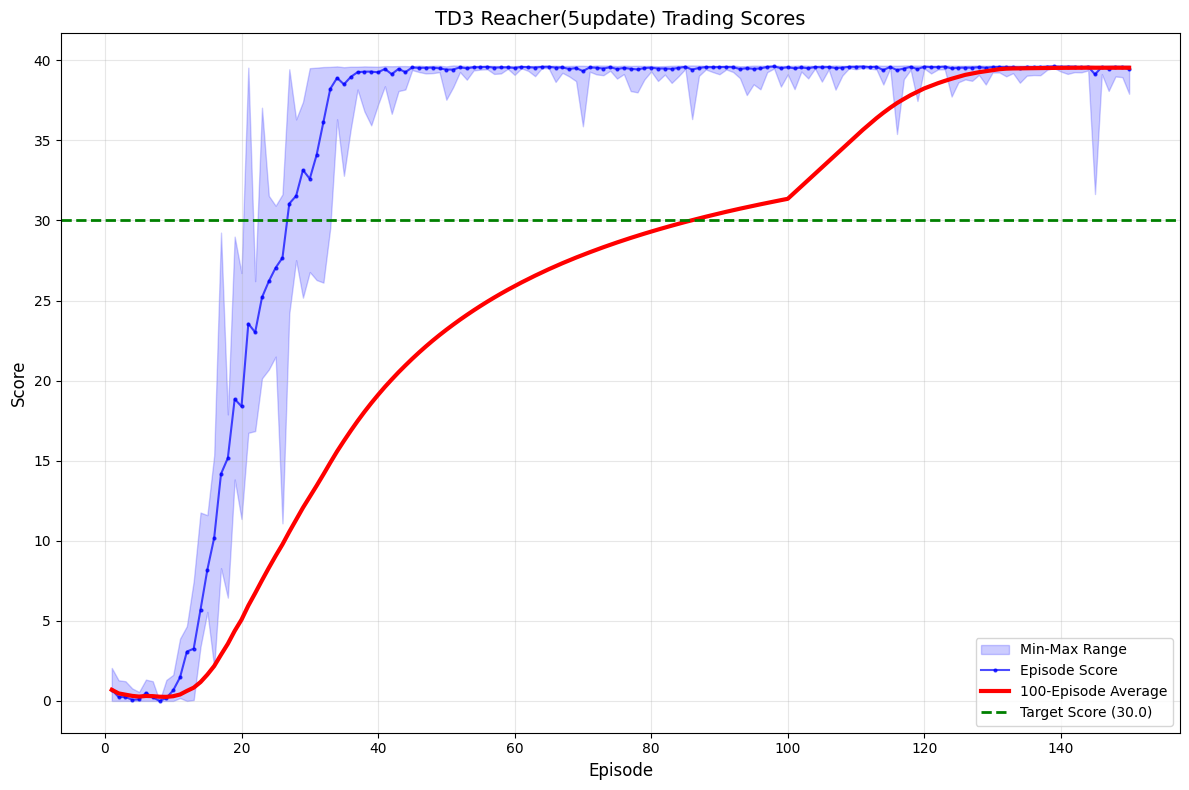

In [6]:
# fig = plot_scores(reward_hist)
# np.save('td3_gaus_0.2.npy', reward_hist)
reward_hist = np.load('./data/td3_reacher_expl02_update5.npy')

fig = plot_scores(reward_hist, window_size=100, title='TD3 Reacher(5update) Trading Scores')

### Common Ratios by Algorithm Type:

1. Off-policy algorithms (TD3, DDPG, SAC)
   * Recommended ratio: 50-128 samples processed per sample collected
   * Current setup: 5 updates × 256 batch / 20 agents = 64:1 ratio (perfect!)

2. On-policy algorithms (PPO, A3C)
   * Recommended ratio: Much lower, typically 1:1 to 4:1
   * Process each sample only a few times since they become stale quickly

##### Why This Works Well
* Sample Efficiency: Gets maximum value from your collected experiences
* Stable Learning: Large enough batch sizes provide gradient stability
* Computation Balance: Good trade-off between environment simulation and network updates
* Memory Efficiency: You don't need to collect as much fresh data

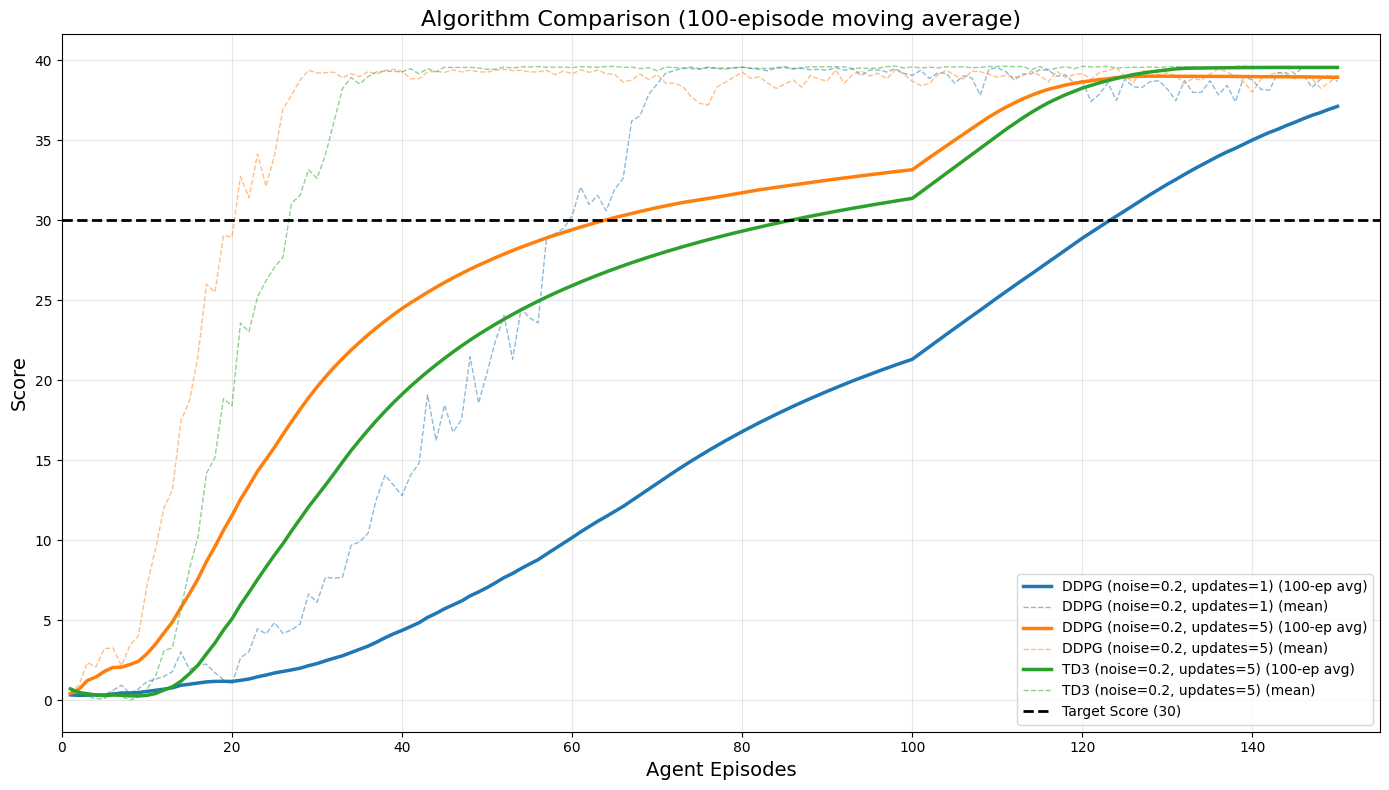

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils.plotting import plot_comparison

# Example usage
file_paths = [
    './data/ddpg_reacher_noise02_update1.npy',
    './data/ddpg_reacher_noise02_update5.npy',
    './data/td3_reacher_expl02_update5.npy'
]

labels = [
    'DDPG (noise=0.2, updates=1)',
    'DDPG (noise=0.2, updates=5)',
    'TD3 (noise=0.2, updates=5)'
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Nice color scheme

comparison_fig = plot_comparison(file_paths, labels, colors, target_score=30)
plt.show()

### Record the Results

In [ ]:
from unityagents import UnityEnvironment
import numpy as np
%matplotlib inline

env = UnityEnvironment(file_name='./app/Reacher_20.app', worker_id=4)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Mono path[0] = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Reacher_20.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Reacher_20.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33


In [ ]:
from rl_algo.td3_agent import Agent as TD3Agent
from utils.recording import play_single_episode

td3Agent = TD3Agent(state_size=state_size, action_size=action_size)
td3Agent.load('./models/td3_reacher_expl0.2_best.pth')

play_single_episode(td3Agent, env, brain_name=brain_name, max_steps=1000)

--------------------------------------------------
TD3 Agent Parameters:
--------------------------------------------------
State Size:            33
Action Size:           4
Random Seed:           None
--------------------------------------------------
Learning Parameters:
Buffer Size:           1000000
Batch Size:            256
Gamma (Discount):      0.99
Tau (Soft Update):     0.005
Actor LR:              0.0003
Critic LR:             0.0003
Exploration Noise:     0.1
Target Policy Noise:   0.2
Target Noise Clip:     0.5
Policy Frequency:      2
Skip Steps:            1
Update Times:          1
Learning Starts:       10000 steps
--------------------------------------------------
Total score (averaged over agents): 39.48
Environment closed successfully


array([39.61999911, 39.61999911, 39.66999911, 39.60999911, 39.66999911,
       39.63999911, 39.49999912, 39.65999911, 39.57999912, 39.58999912,
       39.12999913, 39.52999912, 38.77999913, 39.63999911, 39.56999912,
       39.45999912, 39.57999912, 39.34999912, 38.76999913, 39.62999911])

In [ ]:
from utils.recording import convert_to_mp4, convert_to_gif_simple, convert_to_gif

# mp4_file = convert_to_mp4("TD3_Reacher.mov", remove_original=False)
gif_file = convert_to_gif("./assets/videos/TD3_Reacher.mp4", fps=10, skip_frames=6, scale_factor=0.7)


Converting ./assets/videos/TD3_Reacher.mp4 to GIF...
Processed frame 0
Processed frame 150
Processed frame 300
Processed frame 450
Processed frame 600
Processed frame 750
Processed frame 900
Processed frame 1050
Processed frame 1200
Processed frame 1350
Processed frame 1500
Processed frame 1650
Processed frame 1800
Processed frame 1950
Processed frame 2100
Processed frame 2250
Processed frame 2400
Processed frame 2550
Processed frame 2700
Processed frame 2850
Processed frame 3000
Processed frame 3150
Processed frame 3300
Processed frame 3450
Processed frame 3600
Processed frame 3750
Processed frame 3900
Processed frame 4050
Processed frame 4200
Processed frame 4350
Processed frame 4500
Processed frame 4650
Writing GIF with 799 frames...
Successfully saved to ./assets/videos/TD3_Reacher.gif


<img src="./assets/videos/TD3_Reacher.gif" width="600" alt="TD3 Reacher Agent" />


<video width="640" height="480" controls>
  <source src="./assets/videos/TD3_Reacher.mp4" type="video/mp4">
</video>